In [58]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [59]:

file_path = 'cleaned_organized_journal_data (2).json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Print the top-level keys
print("Top-level keys in the JSON data:")
for key in data.keys():
    print(key)

Top-level keys in the JSON data:
all_p_values
p_value_groups
disciplines
journals
schools
affiliations
researchers


In [60]:
print("\nExploring the content of the 'disciplines' key:")
for discipline, articles in data['disciplines'].items():
    print(f"Discipline: {discipline}, Number of articles: {len(articles)}")
    print("First article example:", articles[0] if articles else "No articles")


Exploring the content of the 'disciplines' key:
Discipline: AC, Number of articles: 1
First article example: {'Article / Title': 'Do accounting firms change strategy through office managing partner appointments? Evidence from the U.S', 'Journal': 'Accounting, Organizations and Society', 'Category': 'AC', 'Year': 2023.0, 'Athors ': 'Michael J.\xa0Mowchan', 'Affiliation 1': 'Baylor University', 'Type of research / methods': 'OLS (', 'sig1': '0.1', 'sig2': '0.05', 'sig3': '0.01'}
Discipline: Accounting , Number of articles: 32
First article example: {'Journal': 'Accounting, Organizations and Society', 'Category': 'Accounting ', 'Year': 2022.0, 'Athors ': 'Martin Jacob, Maximilian A. Müller,  Thorben Wulff', 'Affiliation 1': 'Otto Beisheim School of Management', 'Affiliation 2': 'University of Cologne'}
Discipline: Econ, Number of articles: 18
First article example: {'Article / Title': "The SEC's September spike: Regulatory inconsistency within the fiscal year", 'Journal': 'Journal of Acc

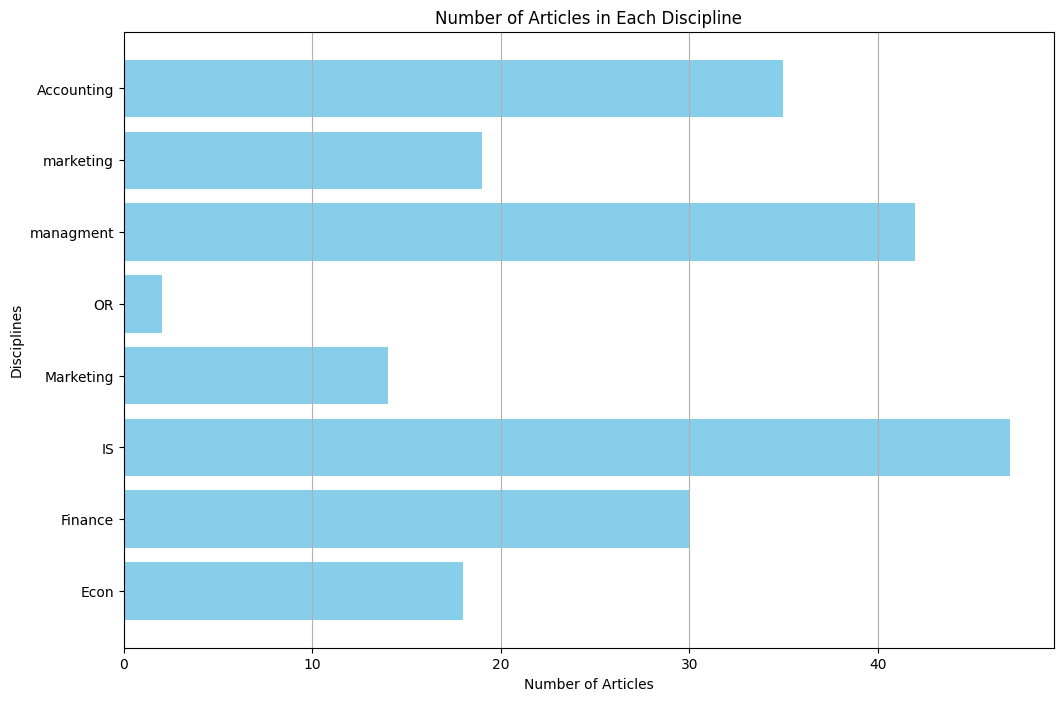

In [61]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
file_path = 'cleaned_organized_journal_data (2).json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the number of articles in each discipline
disciplines = data['disciplines']
discipline_names = []
article_counts = []

# Combine all accounting-related categories into a single category
accounting_categories = ['AC', 'Accounting ', 'accounting']
accounting_count = 0

for discipline, articles in disciplines.items():
    if discipline in accounting_categories:
        accounting_count += len(articles)
    else:
        discipline_names.append(discipline)
        article_counts.append(len(articles))

# Add the combined accounting category
discipline_names.append('Accounting')
article_counts.append(accounting_count)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(discipline_names, article_counts, color='skyblue')
plt.xlabel('Number of Articles')
plt.ylabel('Disciplines')
plt.title('Number of Articles in Each Discipline')
plt.grid(axis='x')
plt.show()


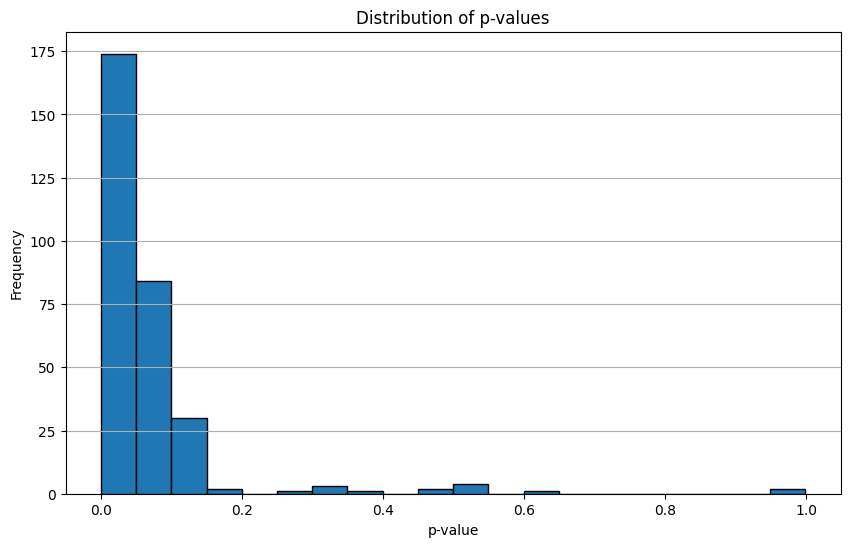

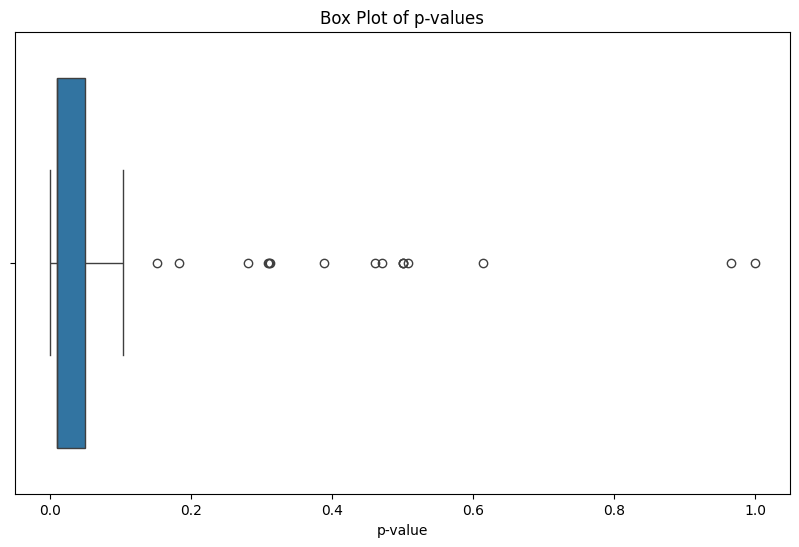

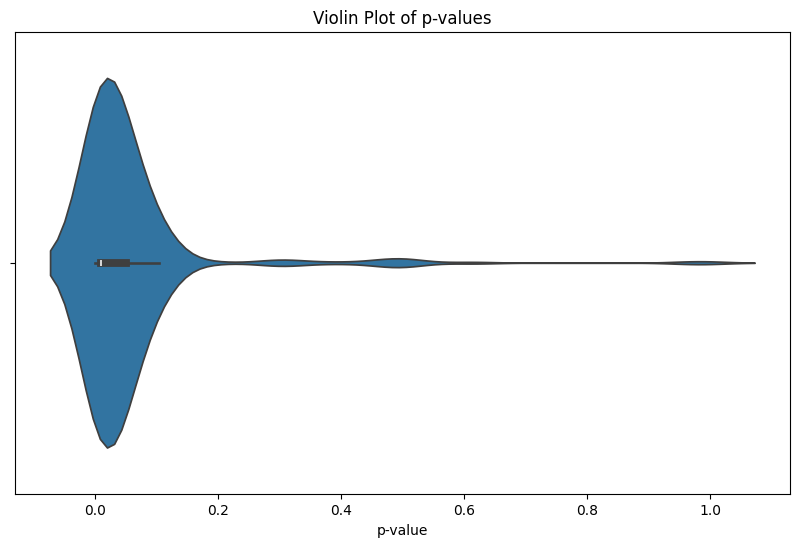

In [62]:

# Extract the p-values
p_values = [item['p_value'] for item in data['all_p_values']]


# Plot the histogram of p-values
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=20, edgecolor='black')
plt.title('Distribution of p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Plot the box plot of p-values
plt.figure(figsize=(10, 6))
sns.boxplot(x=p_values)
plt.title('Box Plot of p-values')
plt.xlabel('p-value')
plt.show()

# Violin plot of p-values
plt.figure(figsize=(10, 6))
sns.violinplot(x=p_values)
plt.title('Violin Plot of p-values')
plt.xlabel('p-value')
plt.show()


Mean p-value: 0.05346217105263158
Median p-value: 0.01
Standard Deviation: 0.11457487977541014
Variance: 0.013127403075549689


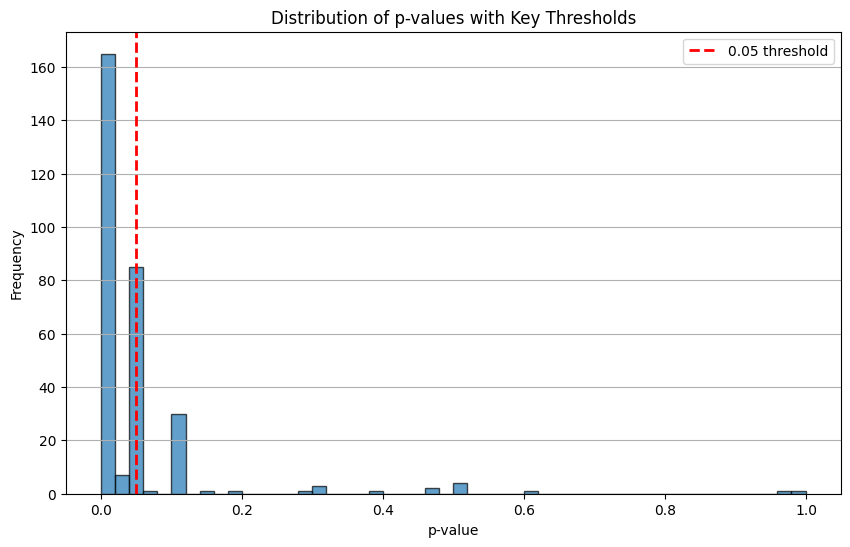

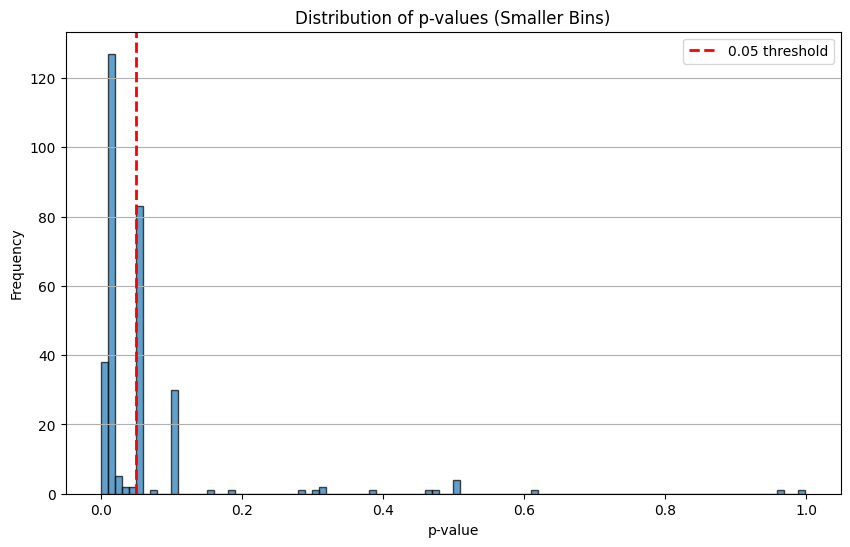

/var/folders/b_/yq8d3c895_9bp_5rk6_wvrvr0000gn/T/ipykernel_68838/2286061771.py:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(p_values, shade=True)


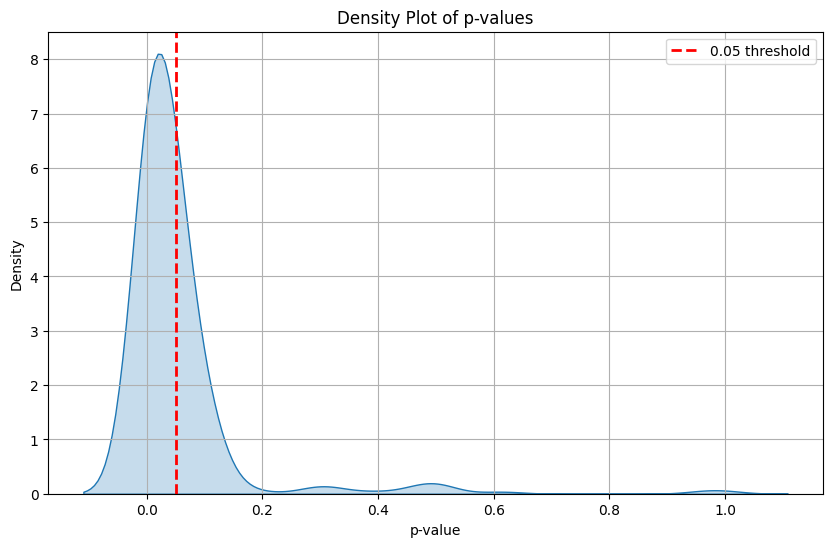

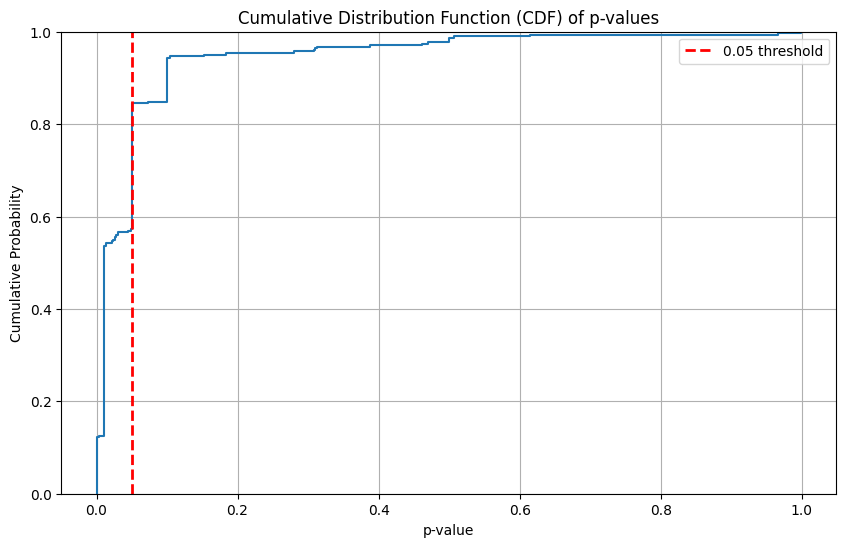

In [63]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the JSON data
file_path = 'cleaned_organized_journal_data (2).json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the p-values
p_values = [item['p_value'] for item in data['all_p_values']]

# Basic Descriptive Statistics
mean_p = np.mean(p_values)
median_p = np.median(p_values)
std_p = np.std(p_values)
var_p = np.var(p_values)

# Print descriptive statistics
print(f'Mean p-value: {mean_p}')
print(f'Median p-value: {median_p}')
print(f'Standard Deviation: {std_p}')
print(f'Variance: {var_p}')

# Plot the histogram of p-values with key thresholds highlighted
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Distribution of p-values with Key Thresholds')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

# Plot the histogram with smaller bins to detect spikes
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=100, edgecolor='black', alpha=0.7)
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Distribution of p-values (Smaller Bins)')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

# Plot the density plot of p-values
plt.figure(figsize=(10, 6))
sns.kdeplot(p_values, shade=True)
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Density Plot of p-values')
plt.xlabel('p-value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Plot the cumulative distribution function (CDF) of p-values
plt.figure(figsize=(10, 6))
sns.ecdfplot(p_values)
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Cumulative Distribution Function (CDF) of p-values')
plt.xlabel('p-value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()


Mean p-value: 0.05346217105263158
Median p-value: 0.01
Standard Deviation: 0.11457487977541014
Variance: 0.013127403075549689


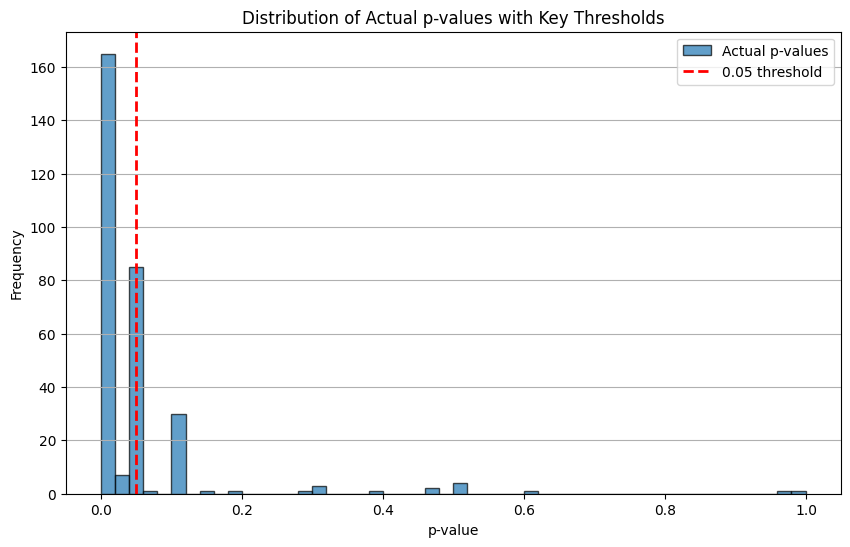

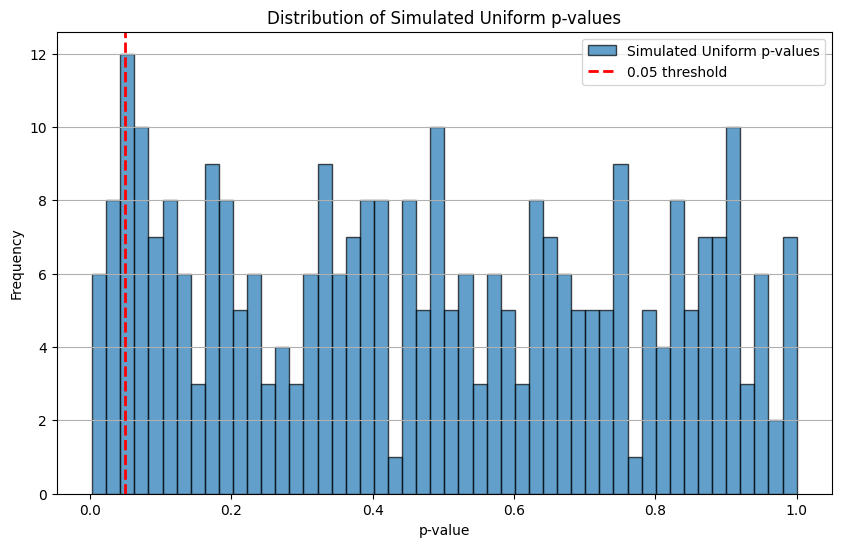

/var/folders/b_/yq8d3c895_9bp_5rk6_wvrvr0000gn/T/ipykernel_68838/959111651.py:54: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(p_values, shade=True, label='Actual p-values')


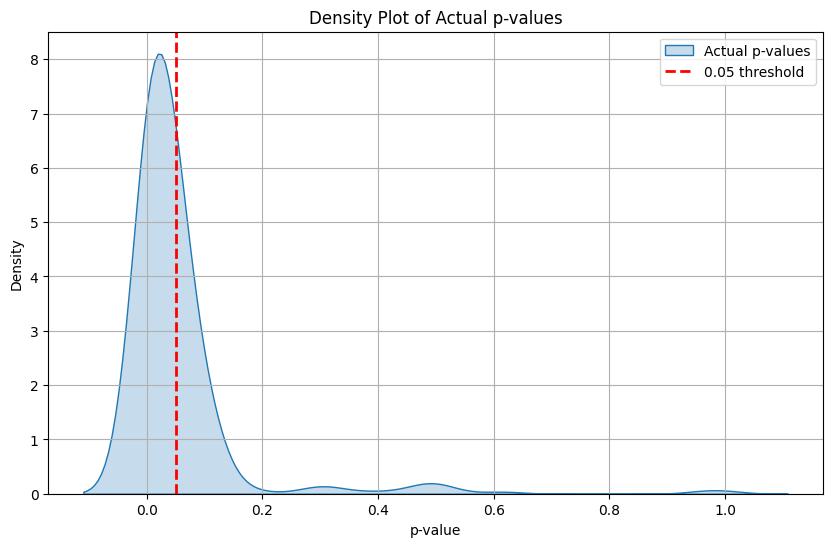

/var/folders/b_/yq8d3c895_9bp_5rk6_wvrvr0000gn/T/ipykernel_68838/959111651.py:65: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulated_p_values, shade=True, label='Simulated Uniform p-values')


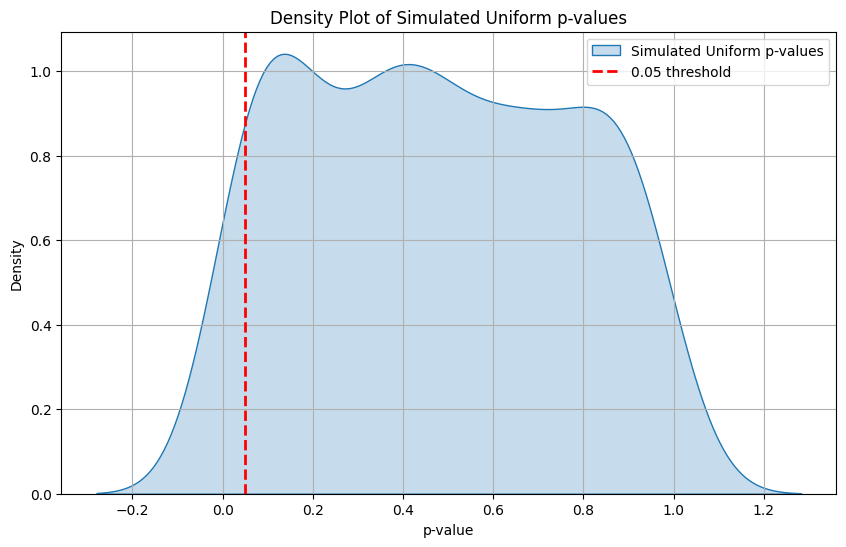

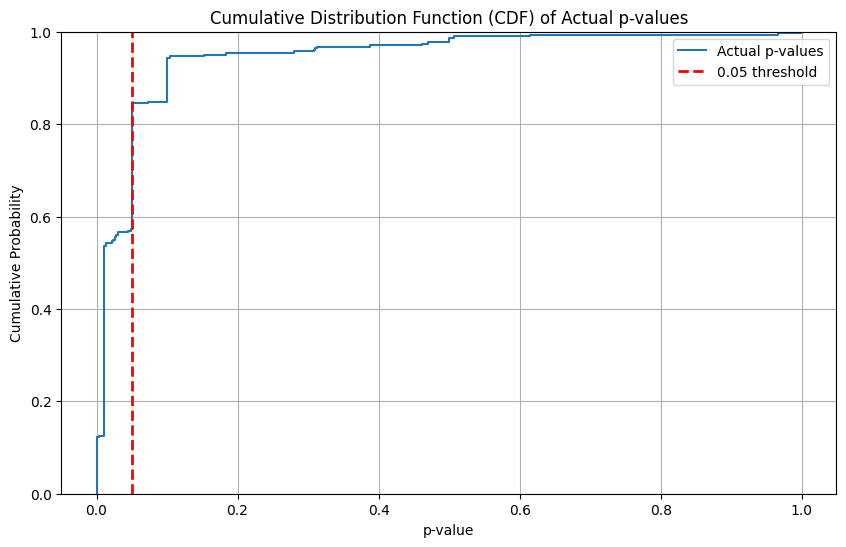

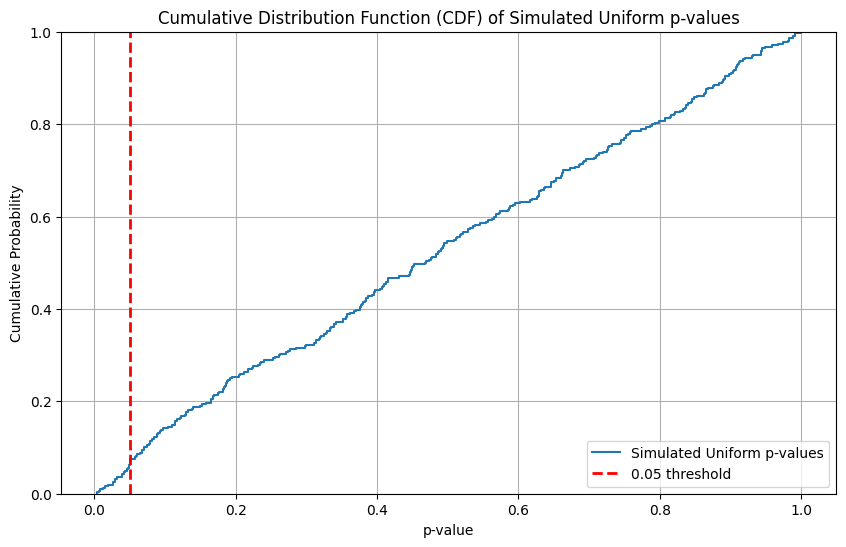

In [64]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the JSON data
file_path = 'cleaned_organized_journal_data (2).json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the p-values
p_values = [item['p_value'] for item in data['all_p_values']]

# Basic Descriptive Statistics
mean_p = np.mean(p_values)
median_p = np.median(p_values)
std_p = np.std(p_values)
var_p = np.var(p_values)

# Print descriptive statistics
print(f'Mean p-value: {mean_p}')
print(f'Median p-value: {median_p}')
print(f'Standard Deviation: {std_p}')
print(f'Variance: {var_p}')

# Simulate uniform p-values
simulated_p_values = np.random.uniform(0, 1, len(p_values))

# Plot the histogram of actual p-values with key thresholds highlighted
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=50, edgecolor='black', alpha=0.7, label='Actual p-values')
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Distribution of Actual p-values with Key Thresholds')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

# Plot the histogram of simulated uniform p-values
plt.figure(figsize=(10, 6))
plt.hist(simulated_p_values, bins=50, edgecolor='black', alpha=0.7, label='Simulated Uniform p-values')
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Distribution of Simulated Uniform p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

# Plot the density plot of actual p-values
plt.figure(figsize=(10, 6))
sns.kdeplot(p_values, shade=True, label='Actual p-values')
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Density Plot of Actual p-values')
plt.xlabel('p-value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Plot the density plot of simulated uniform p-values
plt.figure(figsize=(10, 6))
sns.kdeplot(simulated_p_values, shade=True, label='Simulated Uniform p-values')
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Density Plot of Simulated Uniform p-values')
plt.xlabel('p-value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Plot the CDF of actual p-values
plt.figure(figsize=(10, 6))
sns.ecdfplot(p_values, label='Actual p-values')
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Cumulative Distribution Function (CDF) of Actual p-values')
plt.xlabel('p-value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()

# Plot the CDF of simulated uniform p-values
plt.figure(figsize=(10, 6))
sns.ecdfplot(simulated_p_values, label='Simulated Uniform p-values')
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='0.05 threshold')
plt.title('Cumulative Distribution Function (CDF) of Simulated Uniform p-values')
plt.xlabel('p-value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()


In [65]:
def extract_p_values(obj):
    p_values = []
    if isinstance(obj, dict):
        for key, value in obj.items():
            if key == 'p_value':
                p_values.append(value)
            else:
                p_values.extend(extract_p_values(value))
    elif isinstance(obj, list):
        for item in obj:
            p_values.extend(extract_p_values(item))
    return p_values

# Extract all p-values from the JSON data
p_values = extract_p_values(data)

# Basic Descriptive Statistics
mean_p = np.mean(p_values)
median_p = np.median(p_values)
std_p = np.std(p_values)
var_p = np.var(p_values)

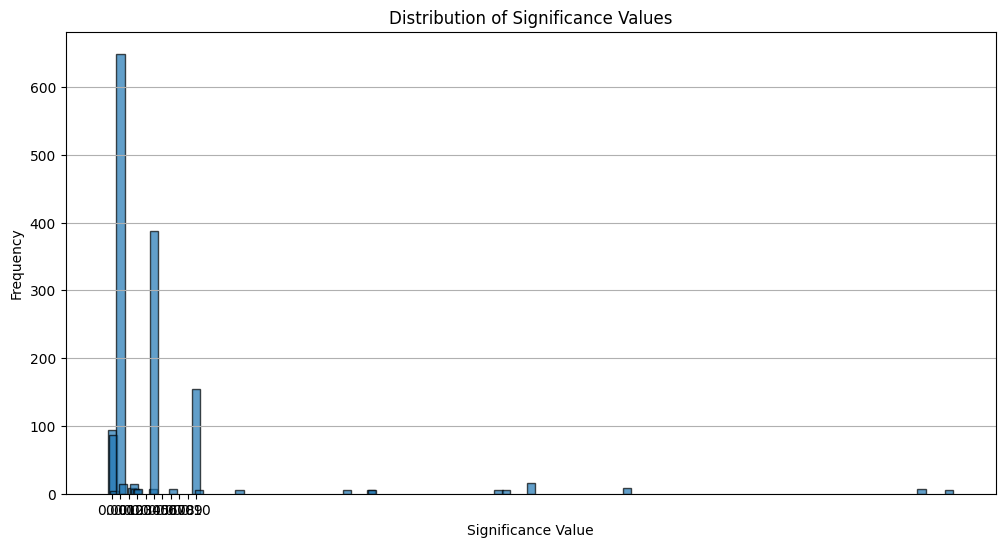

In [66]:
import re



# Function to recursively extract sig values
def extract_sig_values(obj):
    sig_values = []
    if isinstance(obj, dict):
        for key, value in obj.items():
            if re.match(r'^sig\d*$', key):  # Match keys like sig, sig1, sig2, etc.
                try:
                    sig_values.append(float(value))
                except ValueError:
                    continue
            else:
                sig_values.extend(extract_sig_values(value))
    elif isinstance(obj, list):
        for item in obj:
            sig_values.extend(extract_sig_values(item))
    return sig_values

# Extract all sig values from the JSON data
sig_values = extract_sig_values(data)

    
    
# Plot the bar plot of significance values
plt.figure(figsize=(12, 6))
plt.bar(sig_counts.keys(), sig_counts.values(), width=0.01, edgecolor='black', alpha=0.7)
plt.xlabel('Significance Value')
plt.ylabel('Frequency')
plt.title('Distribution of Significance Values')
plt.xticks(np.arange(0, 0.11, step=0.01))  # Adjust the x-ticks for better readability
plt.grid(axis='y')
plt.show()


In [67]:
# Count the frequency of each significance value
unique, counts = np.unique(sig_values, return_counts=True)
sig_counts = dict(zip(unique, counts))


# Print the counts of each significance value
print("Counts of each significance (sig) value:")
for sig_value, count in sig_counts.items():
    print(f"p-value: {sig_value}, Count: {count}")

Counts of each significance (sig) value:
p-value: 0.0, Count: 94
p-value: 0.001, Count: 87
p-value: 0.003, Count: 4
p-value: 0.01, Count: 649
p-value: 0.013, Count: 14
p-value: 0.024, Count: 8
p-value: 0.026, Count: 14
p-value: 0.027, Count: 7
p-value: 0.03, Count: 6
p-value: 0.031, Count: 7
p-value: 0.0489, Count: 7
p-value: 0.05, Count: 388
p-value: 0.073, Count: 7
p-value: 0.1, Count: 155
p-value: 0.104, Count: 6
p-value: 0.152, Count: 6
p-value: 0.28, Count: 6
p-value: 0.309, Count: 6
p-value: 0.31, Count: 6
p-value: 0.461, Count: 6
p-value: 0.47, Count: 6
p-value: 0.5, Count: 16
p-value: 0.6145, Count: 8
p-value: 0.966, Count: 7
p-value: 0.999, Count: 6
p-value: nan, Count: 3210


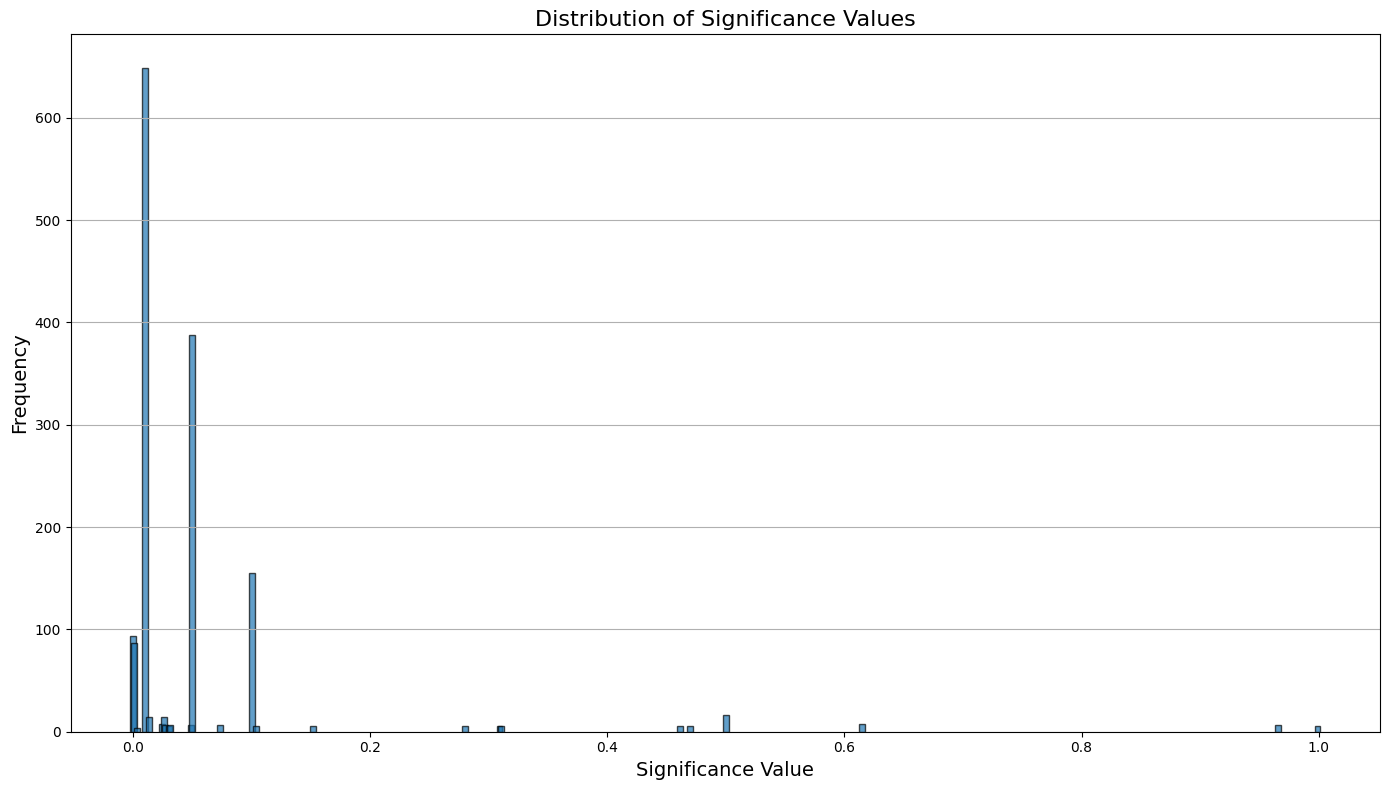

In [68]:
plt.figure(figsize=(14, 8))
plt.bar(sig_counts.keys(), sig_counts.values(), width=0.005, edgecolor='black', alpha=0.7)
plt.xlabel('Significance Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Significance Values', fontsize=16)

# Improve x-ticks readability
#plt.xticks(np.arange(0, max(sig_counts.keys())+0.01, step=0.01), fontsize=10, rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

Counts of each bin:
0.00-0.01: 185
0.01-0.02: 663
0.02-0.03: 29
0.03-0.04: 13
0.04-0.05: 7
0.05-0.06: 388
0.06-0.07: 0
0.07-0.08: 7
0.08-0.09: 0
0.09-0.10: 0
0.10-0.11: 161
0.11-0.12: 0
0.12-0.13: 0
0.13-0.14: 0
0.14-0.15: 0
0.15-0.16: 6
0.16-0.17: 0
0.17-0.18: 0
0.18-0.19: 0
0.19-0.20: 0
0.20-0.21: 0
0.21-0.22: 0
0.22-0.23: 0
0.23-0.24: 0
0.24-0.25: 0
0.25-0.26: 0
0.26-0.27: 0
0.27-0.28: 0
0.28-0.29: 6
0.29-0.30: 0
0.30-0.31: 6
0.31-0.32: 6
0.32-0.33: 0
0.33-0.34: 0
0.34-0.35: 0
0.35-0.36: 0
0.36-0.37: 0
0.37-0.38: 0
0.38-0.39: 0
0.39-0.40: 0
0.40-0.41: 0
0.41-0.42: 0
0.42-0.43: 0
0.43-0.44: 0
0.44-0.45: 0
0.45-0.46: 0
0.46-0.47: 12
0.47-0.48: 0
0.48-0.49: 0
0.49-0.50: 0
0.50-0.51: 16
0.51-0.52: 0
0.52-0.53: 0
0.53-0.54: 0
0.54-0.55: 0
0.55-0.56: 0
0.56-0.57: 0
0.57-0.58: 0
0.58-0.59: 0
0.59-0.60: 0
0.60-0.61: 0
0.61-0.62: 8
0.62-0.63: 0
0.63-0.64: 0
0.64-0.65: 0
0.65-0.66: 0
0.66-0.67: 0
0.67-0.68: 0
0.68-0.69: 0
0.69-0.70: 0
0.70-0.71: 0
0.71-0.72: 0
0.72-0.73: 0
0.73-0.74: 0
0.74-0

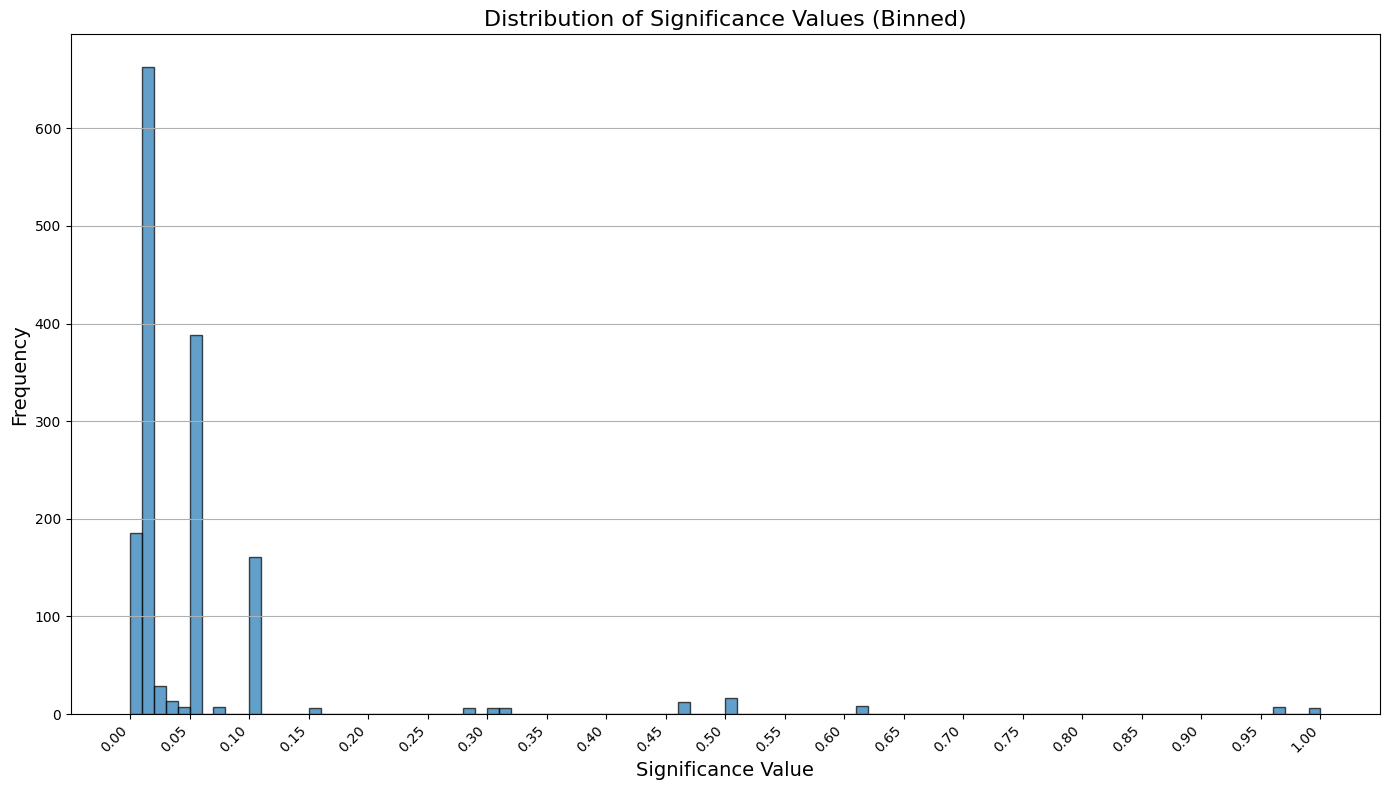

In [69]:
bin_width = 0.01
bins = np.arange(0, max(sig_values) + bin_width, bin_width)
bin_labels = [f'{bin:.2f}-{bin+bin_width:.2f}' for bin in bins[:-1]]

# Count the frequency of each bin
hist, bin_edges = np.histogram(sig_values, bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Print the counts of each bin
print("Counts of each bin:")
for label, count in zip(bin_labels, hist):
    print(f"{label}: {count}")

# Plot the bar plot of significance values with bins
plt.figure(figsize=(14, 8))
plt.bar(bin_centers, hist, width=bin_width, edgecolor='black', alpha=0.7)
plt.xlabel('Significance Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Significance Values (Binned)', fontsize=16)

# Reduce the number of x-ticks for better readability
x_ticks_to_display = np.arange(0, max(sig_values) + bin_width, bin_width * 5)
x_labels_to_display = [f'{bin:.2f}' for bin in x_ticks_to_display]
plt.xticks(x_ticks_to_display, x_labels_to_display, fontsize=10, rotation=45, ha='right')

plt.grid(axis='y')
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the JSON data
file_path = 'cleaned_organized_journal_data (2).json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Function to recursively extract p-values
def extract_p_values(obj):
    p_values = []
    if isinstance(obj, dict):
        for key, value in obj.items():
            if 'p_value' in key:
                try:
                    p_values.append(float(value))
                except ValueError:
                    continue
            else:
                p_values.extend(extract_p_values(value))
    elif isinstance(obj, list):
        for item in obj:
            p_values.extend(extract_p_values(item))
    return p_values

# Extract all p-values from the JSON data
actual_p_values = extract_p_values(data)

# Create a hypothetical uniform distribution of p-values
hypothetical_p_values = np.random.uniform(0, 1, len(actual_p_values))

# Plot the actual p-values distribution
plt.figure(figsize=(14, 7))
sns.histplot(actual_p_values, bins=50, color='blue', kde=True, stat='density', label='Actual p-values')
sns.histplot(hypothetical_p_values, bins=50, color='red', kde=True, stat='density', label='Hypothetical Uniform Distribution')
plt.title('Comparison of Actual and Hypothetical p-value Distributions')
plt.xlabel('p-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


TypeError: float() argument must be a string or a real number, not 'list'

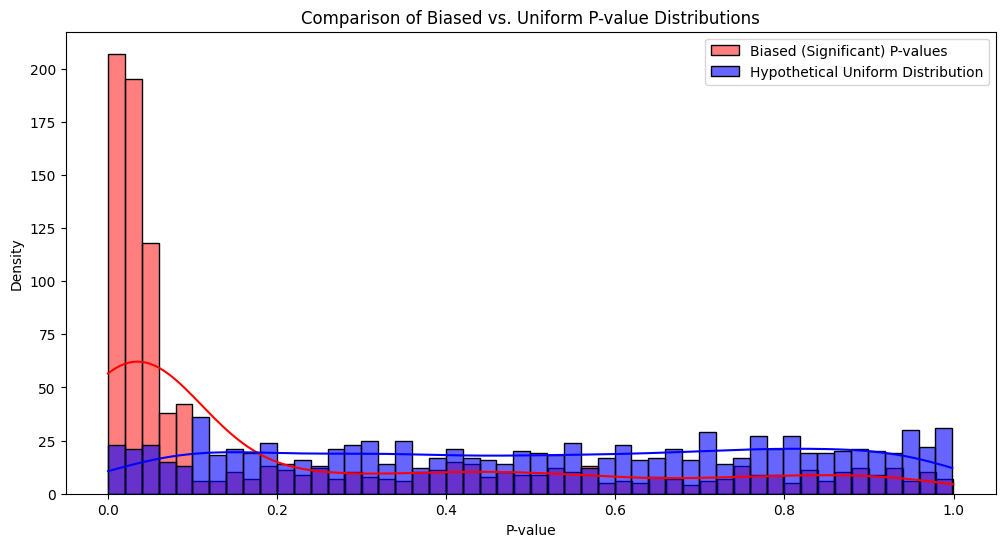

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some 'p-hacked' p-values: more values near 0 and 0.05
np.random.seed(0)
significant_p_values = np.concatenate([
    np.random.uniform(0, 0.05, 500),  # Many low p-values
    np.random.uniform(0.05, 0.1, 100),  # Fewer just above the threshold
    np.random.uniform(0.1, 1, 400)  # Uniform distribution for the rest
])

# Generate a hypothetical uniform distribution
uniform_p_values = np.random.uniform(0, 1, 1000)

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(significant_p_values, bins=50, color='red', label='Biased (Significant) P-values', kde=True)
sns.histplot(uniform_p_values, bins=50, color='blue', label='Hypothetical Uniform Distribution', kde=True, alpha=0.6)
plt.title('Comparison of Biased vs. Uniform P-value Distributions')
plt.xlabel('P-value')
plt.ylabel('Density')
plt.legend()
plt.show()


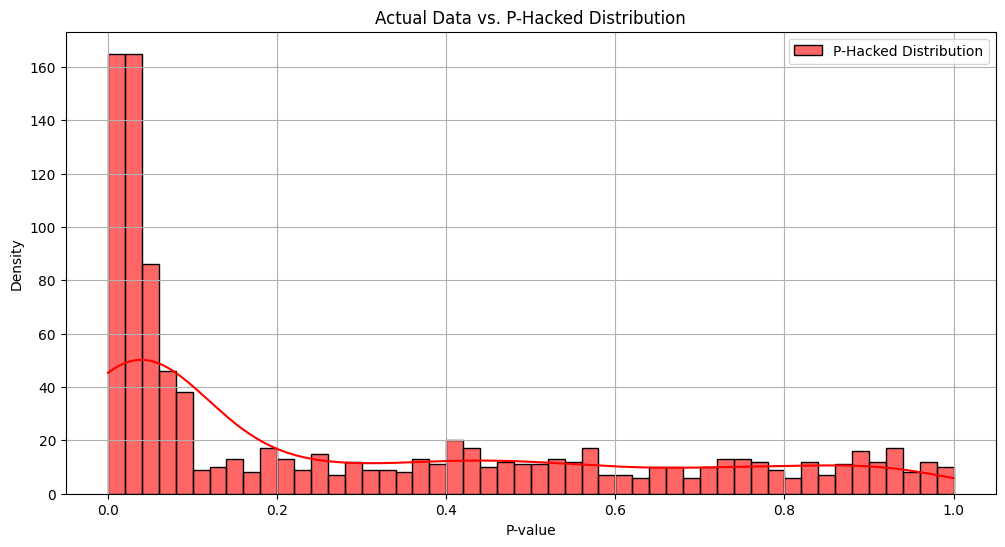

In [7]:
def extract_p_values(obj):
    p_values = []
    if isinstance(obj, dict):
        for key, value in obj.items():
            if 'p_value' in key.lower():  # Check for keys containing 'p_value'
                if isinstance(value, (float, int)):  # Ensure value is a number
                    p_values.append(value)
                elif isinstance(value, str):  # Attempt to convert strings to float
                    try:
                        p_values.append(float(value))
                    except ValueError:
                        continue  # Ignore values that can't be converted to float
            else:
                p_values.extend(extract_p_values(value))
    elif isinstance(obj, list):
        for item in obj:
            p_values.extend(extract_p_values(item))
    return p_values

# Extract all p-values from the JSON data
actual_p_values = extract_p_values(data)

# Simulate a p-value hacked distribution
np.random.seed(0)
hacked_p_values = np.concatenate([
    np.random.uniform(0, 0.049, 400),  # Clustering just below 0.05
    np.random.uniform(0.051, 0.1, 100),  # Fewer values just above 0.05
    np.random.uniform(0.1, 1, 500)  # Regular distribution for the rest
])

# Plotting for comparison
plt.figure(figsize=(12, 6))
sns.histplot(actual_p_values, bins=50, color='blue', label='Actual Data', kde=True, alpha=0.6)
#sns.histplot(hacked_p_values, bins=50, color='red', label='P-Hacked Distribution', kde=True, alpha=0.6)
plt.title('Actual Data vs. P-Hacked Distribution')
plt.xlabel('P-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
